# Graphics with Matplotlib and Seaborn

## Programming and Data Management (EDI 3400)

### *Vegard H. Larsen (Department of Data Science and Analytics)*

## Plan for today: 

1. Introducing Matplotlib and Seaborn
3. Creating different types of plots 
4. In class exercises

# 1. Introducing Matplotlib

## What is Matplotlib?

- The most popular Python library for visualizing and plotting data
- Integrates very well with NumPy and Pandas
- Can create publication quality plots
- Large scope for customization

In [3]:
## Importing Matplotlib

import matplotlib.pyplot as plt

## Let´s create a simple plot

In [1]:
## Let's create some data

import numpy as np

age = np.arange(5, 20, 1)
height = np.arange(110,170, 4)
print(age)
print(height)

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[110 114 118 122 126 130 134 138 142 146 150 154 158 162 166]


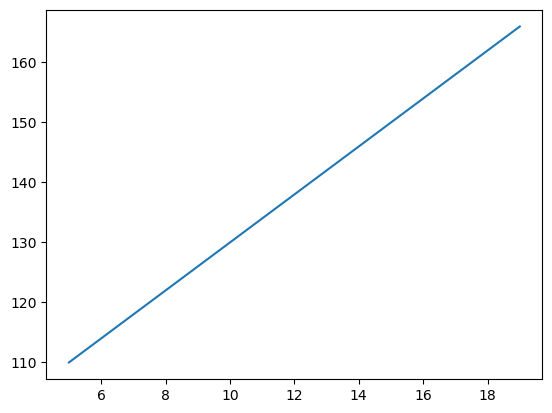

In [4]:
plt.plot(age, height)
plt.show()

# Introducing Seaborn

- Seaborn is a library for making statistical graphics in Python
- It builds on matplotlib and integrates nicely with Pandas
- Can be a faster way to get good-looking plots than relying on Matplotlib only
- Plotting can be used to understand the data better. When you get a new data set, always try to visualize it

In [5]:
# Importing seaborn 

import seaborn as sns

In [6]:
# Load an example data set for Seaborn (a Pandas DataFrame)

tips = sns.load_dataset("tips")

# Using .sample() is a good way of inspecting the DataFrame
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
219,30.14,3.09,Female,Yes,Sat,Dinner,4
89,21.16,3.00,Male,No,Thur,Lunch,2
3,23.68,3.31,Male,No,Sun,Dinner,2
13,18.43,3.00,Male,No,Sun,Dinner,4
242,17.82,1.75,Male,No,Sat,Dinner,2


In [7]:
set(tips['size'])

{1, 2, 3, 4, 5, 6}

## Can create very rich plots with very little code

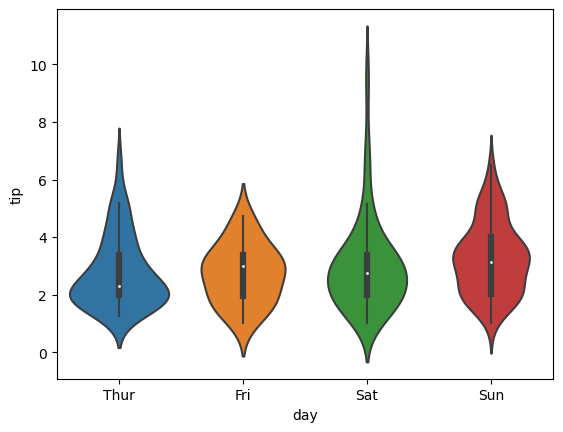

In [11]:
# Create a visualization

sns.violinplot(data=tips, x="day", y="tip")
plt.show()

# 2. Different types of plots

## Line plots

In [12]:
## Let's create some data

import numpy as np

age = np.arange(5, 20, 1)
hight = np.arange(110,170, 4)
print(age)
print(hight)

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[110 114 118 122 126 130 134 138 142 146 150 154 158 162 166]


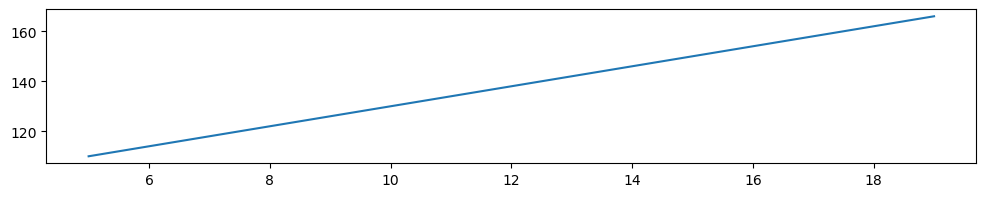

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,2))
plt.plot(age, height)
plt.show()

## Let's improve this plot

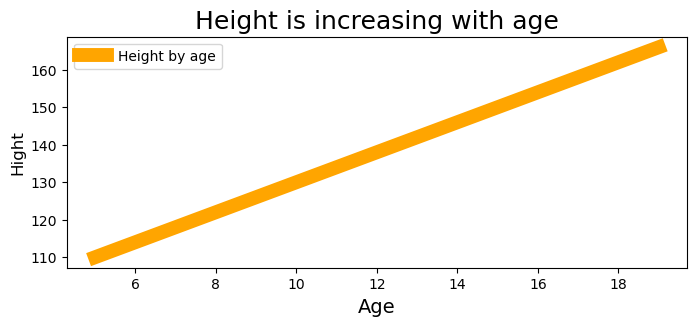

In [23]:
plt.figure(figsize=(8,3))
plt.title('Height is increasing with age', fontsize=18)
plt.plot(age, height, linestyle='-', lw=10, color='orange', label='Height by age')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Hight',  fontsize=12)
plt.legend()
plt.show()

## Use markers instead of a line

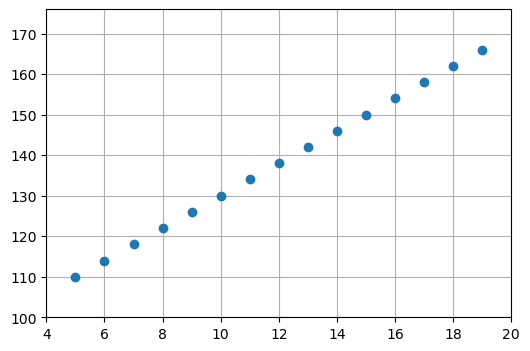

In [28]:
plt.figure(figsize=(6,4))
plt.plot(age, height, 'o', lw=10)

# We can also set what values to include on the axis
plt.xlim(age.min()-1, age.max()+1)
plt.ylim(height.min()-10, height.max()+10)
plt.grid()

## Use two $y$-axis in the same plot 

In [29]:
# Load the tips data set again

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [30]:
# Group the data by the size of the dinner

tips_by_size = tips.groupby('size')[['total_bill', 'tip']].mean()
tips_by_size

,total_bill,tip
size,,
1,7.242500,1.437500
2,16.448013,2.582308
3,23.277632,3.393158
4,28.613514,4.135405
5,30.068000,4.028000
6,34.830000,5.225000


<AxesSubplot:xlabel='size'>

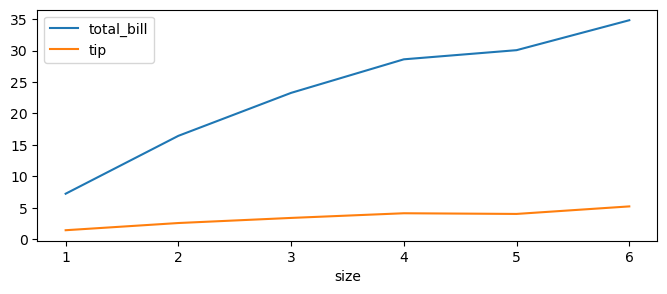

In [31]:
# Plot the total bill and the tip on the same axis 

tips_by_size.plot(figsize=(8,3))

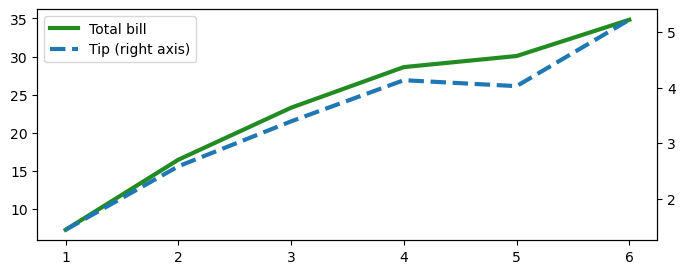

In [35]:
# Let's plot the total_bil and the tip on a different y-axis

fig, ax = plt.subplots(figsize=(8,3))

ax2 = ax.twinx()
ax2.grid(False)

p1, = ax.plot(tips_by_size.index, tips_by_size['total_bill'],
              lw=3, color='forestgreen', label='Total bill')
p2, = ax2.plot(tips_by_size.index, tips_by_size['tip'],
               lw=3, linestyle='--', label='Tip (right axis)')
ax.legend(handles=[p1, p2])
#ax.legend()
#ax2.legend()
plt.show()

<AxesSubplot:>

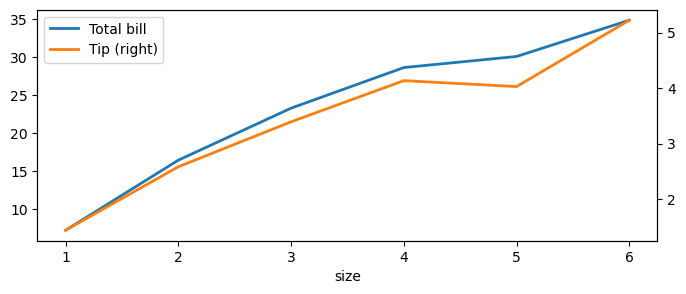

In [36]:
# This is also possible with Pandas

tips_by_size['total_bill'].plot(figsize=(8,3), label='Total bill', lw=2, legend=True)
tips_by_size['tip'].plot(secondary_y=True, label='Tip', lw=2, legend=True)

## Scatter plots

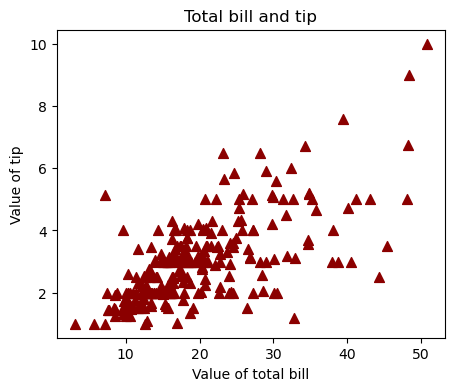

In [47]:
plt.figure(figsize=(5,4))
plt.scatter(tips['total_bill'], tips['tip'], color='darkred', s=50, marker='^')
plt.xlabel('Value of total bill')
plt.ylabel('Value of tip')
plt.title('Total bill and tip')
plt.show()

## Bar plots

In [48]:
tip_by_day = tips.groupby('day')['tip'].mean()
tip_by_day

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

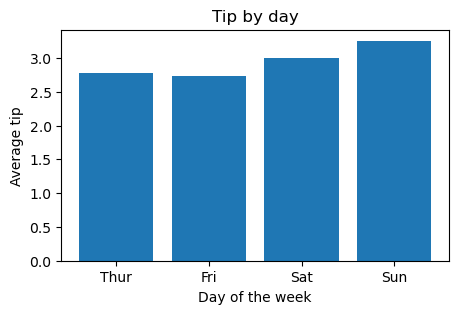

In [49]:
plt.figure(figsize=(5,3))
plt.title('Tip by day')
plt.bar(tip_by_day.index, tip_by_day)
plt.xlabel('Day of the week')
plt.ylabel('Average tip')
plt.show()

## Saving the figure 

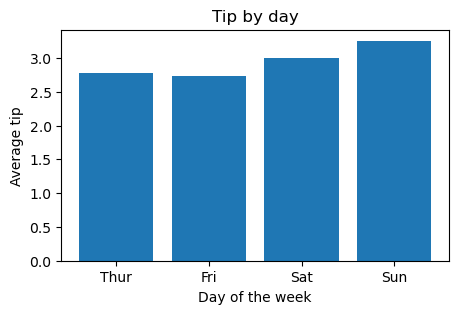

In [50]:
plt.figure(figsize=(5,3))
plt.title('Tip by day')
plt.bar(tip_by_day.index, tip_by_day)
plt.xlabel('Day of the week')
plt.ylabel('Average tip')
plt.savefig('barPlotExample.png')
plt.show()

In [51]:
ls

Lecture8_EDI3400_Fall2022.ipynb      barPlotExample.png
Lecture8_Solutions.ipynb             travel_changeFromSameMonth2019.xlsx


# 3. In class exercises

## Exercises 

1. Plot the function $y=\log(x)$ in a figure. Use $x$-values from 1 to 100. 

2. Add a title and labels on the $x$-and $y$-axis

3. Change the line width to 3, change the color of the line, and add a grid to the plot

4. In the same plot as you plot $\log(x)$, also add a plot of the function $y=\sqrt(x)$. Put the $y$-values for this function on the right axis. 

## Harder exercises

1. Create a bar plot with the number of passengers being picked up in the different boroughs of New York using Matplotlib

2. Create a bar plot with the number of passengers being dropped off in the different boroughs of New York using Seaborn

3. Plot the same figure as in 2. but where you plot the logarithm of passengers being dropped off

4. Create a Scatteplot where you plot the trip distance on the $x$-axis and the total amount and the amount of tip on the $y$-axis. Plot the total amount and the tip in different colors.

5. Use a line plot to visualize the daily number of passengers traveling with a taxi. Only include values for March 2019. 


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

taxis = sns.load_dataset("taxis")
taxis_subsample = taxis[['pickup', 'passengers', 'distance',
                         'total', 'tip', 'pickup_borough', 'dropoff_borough']]
taxis_subsample.sample(4)